*Submitted By:*

**Md. Aukerul Moin Shuvo**


**Roll: 1603061**

***CSE, RUET.***


*Submitted To:*

**Prof. Dr. Md. Al Mamun**

***CSE, RUET.***


**Mounting the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [58]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import data, io, util
import cv2
import sys
import math

**JPEG Image compression(Using DCT) step by step**

JPEG uses a lossy form of compression based on the discrete cosine transform (DCT). This mathematical operation converts each frame/field of the video source from the spatial (2D) domain into the frequency domain (a.k.a. transform domain). A perceptual model based loosely on the human psychovisual system discards high-frequency information, i.e. sharp transitions in intensity, and color hue. In the transform domain, the process of reducing information is called quantization. In simpler terms, quantization is a method for optimally reducing a large number scale (with different occurrences of each number) into a smaller one, and the transform-domain is a convenient representation of the image because the high-frequency coefficients, which contribute less to the overall picture than other coefficients, are characteristically small-values with high compressibility. The quantized coefficients are then sequenced and losslessly packed into the output bitstream. Nearly all software implementations of JPEG permit user control over the compression ratio (as well as other optional parameters), allowing the user to trade off picture-quality for smaller file size. In embedded applications (such as miniDV, which uses a similar DCT-compression scheme), the parameters are pre-selected and fixed for the application.

The compression method is usually lossy, meaning that some original image information is lost and cannot be restored, possibly affecting image quality. There is an optional lossless mode defined in the JPEG standard. However, this mode is not widely supported in products.

JPEG Compression algorithm has five main basic steps.
1. RGB color space to YCbCr color space Conversion.
2. Preprocessing for DCT transformation.
3. DCT Transformation.
4. Co-efficient Quantization.
5. Lossless Encoding.

***1. Custom Zigzag Function:***
Zigzag scan of a matrix. It's argument is a two-dimensional matrix of any size,
not strictly a square one. Function returns a 1-by-(m*n) array, where m and n are sizes of an input matrix, consisting of its items scanned by a zigzag method.

Inverse zigzag scan of a matrix: Arguments are: a 1-by-m*n array, where m & n are vertical & horizontal sizes of an output matrix. Function returns a two-dimensional matrix of defined sizes, consisting of input array items gathered by a zigzag method.




In [4]:
def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
   

    i = 0

    output = np.zeros(( vmax * hmax))
   

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output


def inverse_zigzag(input, vmax, hmax):
	

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    

	while ((v < vmax) and (h < hmax)): 
		  	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output

***2. Run Length Encoding***

***Code Description:*** image2RLE reads an image and performs DCT, applies quantization (Q-Matrix taken is standard JPEG matrix obtained from psycho-visual) experiments) and encodes it using Run Length Encoding.

Encoded data is written onto a text file with name image.txt (this text file has lesser bytes than original image = Compression)


True

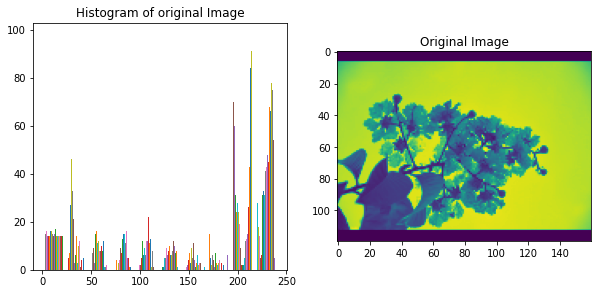

In [21]:
def get_run_length_encoding(image):
    i = 0
    skip = 0
    stream = []    
    bitstream = ""
    image = image.astype(int)
    while i < image.shape[0]:
        if image[i] != 0:            
            stream.append((image[i],skip))
            bitstream = bitstream + str(image[i])+ " " +str(skip)+ " "
            skip = 0
        else:
            skip = skip + 1
        i = i + 1

    return bitstream

# defining block size
block_size = 8

# Quantization Matrix 
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])

# reading image in grayscale style
img = cv2.imread(r"/content/drive/My Drive/DIP/DSC_0362.NEF", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(img)
plt.title('Histogram of original Image')

plt.subplot(2,2,2)
plt.imshow(img)
plt.title('Original Image')


# getting size of the image
[h , w] = img.shape



# No of blocks needed : Calculation

height = h
width = w
h = np.float32(h) 
w = np.float32(w) 

nbh = math.ceil(h/block_size)
nbh = np.int32(nbh)

nbw = math.ceil(w/block_size)
nbw = np.int32(nbw)


# Padding the image, because sometime image size is not dividable to block size
# getting the size of padded image by multiplying block size by number of blocks in height/width

# height of the padded image
H =  block_size * nbh

# width of the padded image
W =  block_size * nbw

# creating a numpy zero matrix with size of H,W
padded_img = np.zeros((H,W))

# copy the values of img into padded_img[0:h,0:w]

padded_img[0:height,0:width] = img[0:height,0:width]

cv2.imwrite(r"/content/drive/My Drive/DIP/uncompressed.bmp", np.uint8(padded_img))

***3. Encoding:***
Dividing the image into block size by block size (here: 8-by-8) blocks. To each block then applying 2D discrete cosine transform. Reordering the DCT coefficients in zig-zag order. Then reshaped it back to block size by block size (here: 8-by-8).

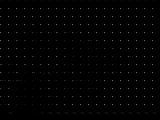

In [22]:
for i in range(nbh):
    
        # Computing start and end row index of the block
        row_ind_1 = i*block_size                
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            # Computeingstart & end column index of the block
            col_ind_1 = j*block_size                       
            col_ind_2 = col_ind_1+block_size
                        
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
                       
            # applying 2D discrete cosine transform to the selected block                       
            DCT = cv2.dct(block)            

            DCT_normalized = np.divide(DCT,QUANTIZATION_MAT).astype(int)            
            
            # reordering DCT coefficients in zig zag order by calling zigzag function
            # it will give a one dimentional array
            reordered = zigzag(DCT_normalized)

            # reshaping the reorderd array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(reordered, (block_size, block_size)) 
            
            # copying reshaped matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped                        


cv2_imshow((padded_img))

arranged = padded_img.flatten()

bitstream = get_run_length_encoding(arranged)

# Two terms are assigned for size, semicolon denotes end of image to reciever
bitstream = str(padded_img.shape[0]) + " " + str(padded_img.shape[1]) + " " + bitstream + ";"

# Written to image.txt
file1 = open(r"/content/drive/My Drive/DIP/image.txt","w")
file1.write(bitstream)
file1.close()

cv2.waitKey(0)
cv2.destroyAllWindows()

***4. Decoding:***

RLE2image reads image.txt and decodes it into image again, writing a new compressed image onto the disk.

Text(0.5, 1.0, 'Compressed Image')

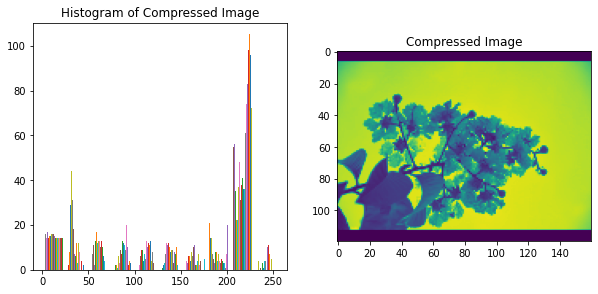

In [10]:
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
 
# defining block size
block_size = 8
 
# Reading image.txt to decode it as image
with open(r"/content/drive/My Drive/DIP/image.txt", 'r') as myfile:
    image=myfile.read()
 
# sppliting into tokens seperated by space characters
details = image.split()
 
#python-crap to get integer from tokens : h and w are height and width of image (first two items)
h = int(''.join(filter(str.isdigit, details[0])))
w = int(''.join(filter(str.isdigit, details[1])))
 
# declaring an array of zeros (It helps to reconstruct bigger array on which IDCT and all will be applied)
array = np.zeros(h*w).astype(int)
 
 
# some loop variable initialisation
k = 0
i = 2
x = 0
j = 0
 
 
# This loop gives reconstructed array of size of image
 
while k < array.shape[0]:

    if(details[i] == ';'):
        break

    if "-" not in details[i]:
        array[k] = int(''.join(filter(str.isdigit, details[i])))        
    else:
        array[k] = -1*int(''.join(filter(str.isdigit, details[i])))        
 
    if(i+3 < len(details)):
        j = int(''.join(filter(str.isdigit, details[i+3])))
 
    if j == 0:
        k = k + 1
    else:                
        k = k + j + 1        
 
    i = i + 2
 
array = np.reshape(array,(h,w))
 
# loop for constructing intensity matrix form frequency matrix (IDCT and all)
i = 0
j = 0
k = 0
 
# initialisation of compressed image
padded_img = np.zeros((h,w))
 
while i < h:
    j = 0
    while j < w:        
        temp_stream = array[i:i+8,j:j+8]                
        block = inverse_zigzag(temp_stream.flatten(), int(block_size),int(block_size))            
        de_quantized = np.multiply(block,QUANTIZATION_MAT)                
        padded_img[i:i+8,j:j+8] = cv2.idct(de_quantized)        
        j = j + 8        
    i = i + 8
 
# clamping to  8-bit max-min values
padded_img[padded_img > 255] = 255
padded_img[padded_img < 0] = 0
 
# compressed image is written into compressed_image.mp file
cv2.imwrite(r"/content/drive/My Drive/DIP/compressed_image.bmp",np.uint8(padded_img))

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist((padded_img))
plt.title('Histogram of Compressed Image')

plt.subplot(2,2,2)
plt.imshow(img)
plt.title('Compressed Image')


***LOCO I***
*Algorithm:* Prior to encoding, there are two essential steps to be done in the modeling stage: decorrelation (prediction) and error modeling.



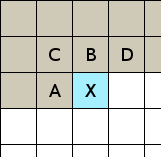



Figure: Three neighboring samples around the sample to be predicted




Decorrelation/prediction
In the LOCO-I algorithm, primitive edge detection of horizontal or vertical edges is achieved by examining the neighboring pixels of the current pixel X as illustrated in Figure. The pixel labeled by B is used in the case of a vertical edge while the pixel located at A is used in the case of a horizontal edge. This simple predictor is called the Median Edge Detection (MED) predictor or LOCO-I predictor. The pixel X is predicted by the LOCO-I predictor according to the following guesses:

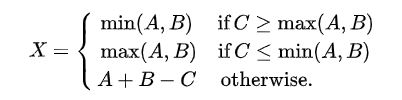



The three simple predictors are selected according to the following conditions:
 

(1) it tends to pick B in cases where a vertical edge exists left of the X, 

(2) A in cases of an horizontal edge above X, or (3) A + B – C if no edge is detected.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


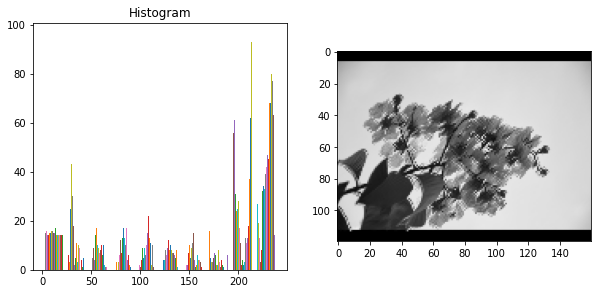

In [11]:
#assigning shape of the image to row & col variable
[row , col] = img.shape

# declaring an array of zeros which will have the predicted values later
loco = np.zeros([row, col]);


for i in range(row):
  for j in range(col):
    A = img[i-1,j]     #left neighbor
    B = img[i,j-1]     #upper neighbor
    C = img [i-1,j-1]  #upper left neighbor
    #predictor conditions cheching
    if(C >= max(A,B)):
      loco[i,j] = min(A, B)
    elif(C <= min(A,B)):
      loco[i,j] = max(A,B)
    else:
      loco[i,j] = A + B - C
    


#plotting the compressed image with histogram
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(loco)
plt.title('Histogram')

plt.subplot(2,2,2)

from PIL import Image
imgloco = Image.fromarray(loco)
plt.imshow(imgloco)



***CALIC:*** A context-based, adaptive, lossless image codec (CALIC). CALIC obtains higher lossless compression of continuous-tone images than other techniques reported in the literature. This high coding efficiency is accomplished with relatively low time and space complexities. CALIC puts heavy emphasis on image data modeling. A unique feature of CALIC is the use of a large number of modeling contexts to condition a non-linear predictor and make it adaptive to varying source statistics. The non-linear predictor adapts via an error feedback mechanism. In this adaptation process, CALIC only estimates the expectation of prediction errors conditioned on a large number of contexts rather than estimating a large number of conditional error probabilities. The former estimation technique can afford a large number of modeling contexts without suffering from the sparse context problem. The low time and space complexities of CALIC are attributed to efficient techniques for forming and quantizing modeling contexts

In [15]:
out = np.empty((img.shape[0], img.shape[1]), dtype=np.uint8) # GAP based image
B = np.empty((img.shape[0], img.shape[1]), dtype=np.int16) # predicted context
thre = [5, 15, 25, 42, 60, 85, 140]
N = np.zeros((4 * 256,), dtype=np.int32)
S = np.zeros((4 * 256,), dtype=np.int32)
err_for_del = 0
context = np.empty((img.shape[0], img.shape[1]), dtype=np.uint8) # Final context formation
# Final context formation given by "context" variable

def get(im, i, j):
    if 0 <= i < im.shape[0] and 0 <= j < im.shape[1]:
        return int(im[i, j])
    return 0

In [18]:
def GAP(im, i, j):
    # predicting context
    In = get(im, i, j-1)
    Iw = get(im, i-1, j)
    Ine = get(im, i+1, j-1)
    Inw = get(im, i-1, j-1)
    Inn = get(im, i, j-2)
    Iww = get(im, i-2, j)
    Inne = get(im, i+1, j-2)
    # input to GAP
    dh = abs(Iw - Iww) + abs(In - Inw) + abs(In - Ine)
    dv = abs(Iw - Inw) + abs(In - Inn) + abs(Ine - Inne)
    # GAP
    if dv - dh > 80:
        ic = Iw
    elif dv - dh < -80:
        ic = In
    else:
        ic = (Iw + In) / 2 + (Ine - Inw) / 4
        if dv - dh > 32:
            ic = (ic + Iw) / 2
        elif dv - dh > 8:
            ic = (3*ic + Iw) / 4
        elif dv - dh < -32:
            ic = (ic + In) / 2
        elif dv - dh < -8:
            ic = (3*ic + In) / 4
    #
    
    # Texture Quantizer
    temp = list(map(lambda x: int(x < ic),[(2*Iw)-Iww,(2*In)-Inn,Iww,Inn,Ine,Inw,Iw,In]))
    B = temp[0] << 7 | temp[1] << 6 | temp[2] << 5 | temp[3] << 4 | temp[4] << 3 | temp[5] << 2 | temp[6] << 1 | temp[7]
    
    # Delta.
    global err_for_del
    delt = dh + dv + 2*abs(err_for_del) #Error energy estimator computation
    
    # Error Energy Quantizer
    #   Now quantize error energy estimator according to thresholds given by CALIC
    #   Into 8 partitions
    Qdel = -1
    k = 0
    while k < len(thre):
        if delt <= thre[k]:
            Qdel = k
            break
        k += 1
    if Qdel == -1:
        Qdel = 7
        
    # Context Modeling Context C
    C = B * Qdel // 2
    
    # global err
    # Update N (No of occurrences)
    N[C] += 1
    S[C] += err_for_del
    # Limit the count
    if N[C] == 255:
        N[C] = N[C] / 2
        S[C] = S[C] / 2
    
    ed = S[C] // N[C]
    Itilde = ic + ed
    out[i, j] = Itilde
    context[i, j] = C  # store the context
    err_for_del = get(im, i, j) - Itilde


# Apply GAP to every pixel
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        GAP(img, i, j)

In [27]:
# Store the un-coded calic raw image.
f = open(r"/content/drive/My Drive/DIP/compressed_flower.craw", "wb")
f.write(N.tobytes())
f.write(S.tobytes())
f.write(context.tobytes())
f.close()

In [28]:
# Store the raw image
f = open(r"/content/drive/My Drive/DIP/flower.craw", "wb")
f.write(img.tobytes())
f.close()

In [ ]:
from google.colab import files
files.upload()

***Adaptive Arithmetic Compression:***
One advantage of arithmetic coding over other similar methods of data compression is the convenience of adaptation. Adaptation is the changing of the frequency (or probability) tables while processing the data. The decoded data matches the original data as long as the frequency table in decoding is replaced in the same way and in the same step as in encoding. The synchronization is, usually, based on a combination of symbols occurring during the encoding and decoding process.

Compression application using adaptive arithmetic coding:

Usage: python adaptive-arithmetic-compress.py InputFile OutputFile

The application starts with a flat frequency table of 257 symbols (all set to a frequency of 1),
and updates it after each byte encoded. The corresponding decompressor program also starts with a flat
frequency table and updates it after each byte decoded. It is by design that the compressor and
 decompressor have synchronized states, so that the data can be decompressed properly.

In [78]:
import arithmetic
import arithmeticcoding

#Adaptive Arithmatic Compression
def main(args):
	# Handle command line arguments
	if len(args) != 2:
		sys.exit("Usage: python adaptive-arithmetic-compress.py InputFile OutputFile")
	inputfile  = args[0]
	outputfile = args[1]
	
	# Performing file compression
	with open(r"/content/drive/My Drive/DIP/flower.craw", "rb") as inp:
		bitout = arithmeticcoding.BitOutputStream(open(r"/content/drive/My Drive/DIP/compressed_flower", "wb"))
		try:
			compress(inp, bitout)
		finally:
			bitout.close()
   
  


def compress(inp, bitout):
	initfreqs = arithmeticcoding.FlatFrequencyTable(257)
	freqs = arithmeticcoding.SimpleFrequencyTable(initfreqs)
	enc = arithmeticcoding.ArithmeticEncoder(bitout)
	while True:
		# Read and encode one byte
		symbol = inp.read(1)
		if len(symbol) == 0:
			break
		symbol = symbol[0] 
		enc.write(freqs, symbol)
		freqs.increment(symbol)
	enc.write(freqs, 256)  # EOF
	enc.finish()  # Flush remaining code bits
	


# Main launcher
if __name__ == "__main__":
	main(sys.argv[1 : ])
 

***Comparison***

Text(0.5, 1.0, 'Compressed')

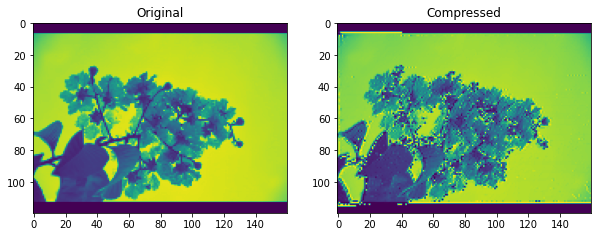

In [81]:
#plotting the compressed image with original
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')

plt.subplot(2,2,2)
plt.imshow(out)
plt.title('Compressed')

